In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CORDIS

## 1. Data loading and preprocessing

In [2]:
# Load data

columns_dates = ['startDate','endDate']

cordish2020 = pd.read_csv("data/cordis/cordis-h2020projects.csv",sep=";",decimal=",",parse_dates=columns_dates)
cordisfp7 = pd.read_csv("data/cordis/cordis-fp7projects.csv",sep=";",decimal=",",parse_dates=columns_dates)
cordisfp6 = pd.read_csv("data/cordis/cordis-fp6projects.csv",sep=";",decimal=",",parse_dates=columns_dates)

# Manual preprocessing...

cordisfp6 = cordisfp6.drop(columns=['totalCost'])
cordisfp6 = cordisfp6.drop(columns=['ecMaxContribution'])
totalCostFP6 = pd.read_csv("data/cordis/totalCostFP6.csv",sep=";",decimal=".")
cordisfp6['totalCost'] = totalCostFP6
ecMaxContributionFP6 = pd.read_csv("data/cordis/ecMaxContributionFP6.csv",sep=";",decimal=".")
cordisfp6['ecMaxContribution'] = ecMaxContributionFP6

In [3]:
# Shapes
print("H2020 (2014-2020): ",cordish2020.shape)
print("FP7 (2007-2013): ",cordisfp7.shape)
print("FP6 (2002-2006): ",cordisfp6.shape)

H2020 (2014-2020):  (32161, 21)
FP7 (2007-2013):  (25778, 21)
FP6 (2002-2006):  (10082, 21)


In [4]:
# Append data
cordis = cordish2020.append(cordisfp7)
cordis = cordis.append(cordisfp6)
cordis.shape

(68021, 21)

In [5]:
# Compute duration in days
cordis['duration_days'] = (cordis['endDate'] - cordis['startDate']).dt.days

# Extract start and end years and store in new column of dataframe
cordis['startYear'] = pd.DatetimeIndex(cordis['startDate']).year
cordis['endYear'] = pd.DatetimeIndex(cordis['endDate']).year
cordis = cordis.fillna({'startYear':0,'endYear':0})
cordis = cordis.astype({"startYear":'int', "endYear":'int'}) 

In [6]:
# Discard non-european countries
europe_countries = ['IT', 'UK', 'AT', 'FI', 'EL', 'DE', 'SE', 'NL', 'IE', 'ES', 'CH',
                    'NO', 'FR', 'DK', 'EE', 'RS', 'PT', 'IL', 'CY', 'SI', 'PL', 'SK',
                    'LV', 'LU', 'BE', 'TR', 'RO', 'LT', 'BG', 'IS', 'HU', 'UA', 'MT',
                    'HR', 'ME', 'CZ', 'GE', 'BA', 'FO', 'MD', 'MK', 'AM', 'AL', 'MC', 
                    'RU', 'BY', 'AZ', 'LI']
cordis = cordis[cordis['coordinatorCountry'].isin(europe_countries)]

In [7]:
# Remove start and end years equal to 0
cordis = cordis.drop(cordis[(cordis.startYear < 0) | (cordis.endYear < 0)].index)

In [8]:
# Remove useless columns
cordis = cordis.drop(columns=['startDate','endDate','subjects'])

In [9]:
cordis.shape

(67703, 21)

In [10]:
cordis.dtypes

rcn                       int64
id                       object
acronym                  object
status                   object
programme                object
topics                   object
frameworkProgramme       object
title                    object
projectUrl               object
objective                object
totalCost               float64
ecMaxContribution       float64
call                     object
fundingScheme            object
coordinator              object
coordinatorCountry       object
participants             object
participantCountries     object
duration_days           float64
startYear                 int64
endYear                   int64
dtype: object

In [11]:
cordis.head(5)

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,projectUrl,objective,...,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,duration_days,startYear,endYear
0,197163,672890,TailorFit,CLOSED,H2020-EU.2.3.1.;H2020-EU.2.1.2.,NMP-25-2014-1,H2020,TailorFit; The Integrated “made to measure” wo...,http://www.creasolution.com,'The project targets all luxury fashion firms ...,...,50000.00,H2020-SMEINST-1-2014,SME-1,CREA SOLUTION SRL,IT,NaN,NaN,182.0,2015,2015
1,193257,633814,PEGASUS,CLOSED,H2020-EU.3.2.,ISIB-01-2014,H2020,Public Ecosystem Goods And Services from land ...,http://pegasus.ieep.eu/,EU's agricultural and forestry land provides a...,...,2977525.00,H2020-ISIB-2014-2,RIA,"INSTITUTE FOR EUROPEAN ENVIRONMENTAL POLICY, L...",UK,MITTETULUNDUSUHING OKOLOOGILISTE TEHNOLOOGIATE...,EE;FR;NL;AT;PT;UK;CZ;IT;DE;SI;BE,1095.0,2015,2018
2,213807,785419,LABOR,SIGNED,H2020-EU.3.4.5.4.,JTI-CS2-2017-CFP06-AIR-02-49,H2020,Lean robotized AssemBly and cOntrol of composi...,https://www.labor-project.eu/,"According to the Global Market Forecast, there...",...,1995062.50,H2020-CS2-CFP06-2017-01,CS2-IA,AEA s.r.l.,IT,UNIVERSITA DEGLI STUDI DI SALERNO;UNIVERSITA D...,IT,1095.0,2018,2021
3,205543,721362,ZAero,CLOSED,H2020-EU.2.1.5.1.,FOF-03-2016,H2020,Zero-defect manufacturing of composite parts i...,http://www.zaero-project.eu,In the aerospace industry very high quality st...,...,3548206.01,H2020-FOF-2016,IA,PROFACTOR GMBH,AT,M TORRES DISEÑOS INDUSTRIALES SA;FUNDACION PAR...,ES;FR;DE,1094.0,2016,2019
4,229365,861924,SustInAfrica,SIGNED,H2020-EU.3.2.1.1.,SFS-35-2019-2020,H2020,Sustainable intensification of food production...,NaN,Large areas of agricultural land in W. and N. ...,...,6997318.74,H2020-SFS-2019-2,RIA,LUONNONVARAKESKUS,FI,GORTA;FCIENCIAS.ID - ASSOCIACAO PARA A INVESTI...,IE;PT;GH;BF;TN;NE;EG;AT;IT;DE,1825.0,2020,2025


## 2. Descriptive analysis

### Status
- ONG: ongoing
- SIGNED: firmado
- CLOSED: cerrado (¿sin terminar?)
- CLO: ¿=closed?
- TERMINATED: terminado (¿finalizado?)
- CAN: ¿?

In [12]:
cordis['status'].value_counts()

ONG           23354
SIGNED        20542
CLOSED        11173
CLO            2135
TERMINATED      424
CAN             171
Name: status, dtype: int64

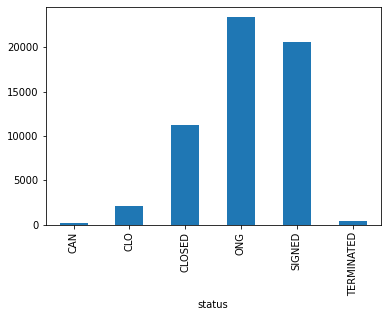

In [13]:
cordis.groupby('status')['id'].nunique().plot(kind='bar')
plt.show()

### Start and end dates

In [14]:
cordis['startYear'].value_counts()

2019    5546
2018    5059
2015    5024
2017    4972
2016    4945
2013    4539
2020    4479
2012    4306
2011    3942
2010    3584
2014    3327
2006    3012
2009    2895
2008    2879
2005    2751
2004    2439
2021    2032
2007    1516
0        223
2003     216
2022      17
Name: startYear, dtype: int64

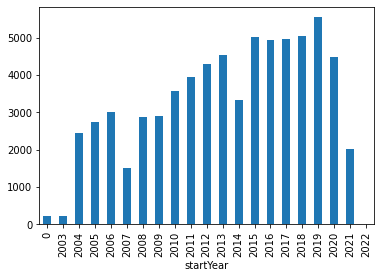

In [15]:
cordis.groupby('startYear')['id'].nunique().plot(kind='bar')
plt.show()

In [16]:
cordis['endYear'].value_counts()

2021    5139
2018    5103
2016    4980
2019    4933
2017    4893
2015    4706
2022    4689
2020    3621
2014    3583
2023    3318
2013    3156
2012    2664
2008    2632
2011    2235
2009    2227
2007    2120
2010    2098
2024    1871
2025    1200
2006    1190
2005     495
2026     430
0        307
2004      96
2027      15
2003       2
Name: endYear, dtype: int64

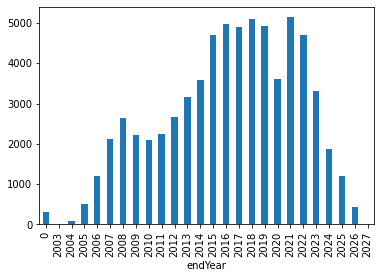

In [17]:
cordis.groupby('endYear')['id'].nunique().plot(kind='bar')
plt.show()

In [18]:
cordis['duration_days'].mean()

1105.7746238537554

array([[<AxesSubplot:title={'center':'duration_days'}>]], dtype=object)

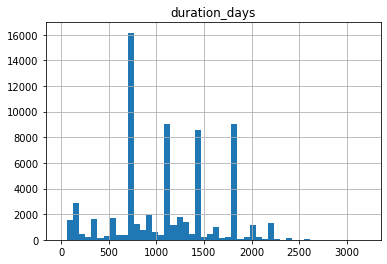

In [19]:
cordis.hist(column='duration_days',bins=50)

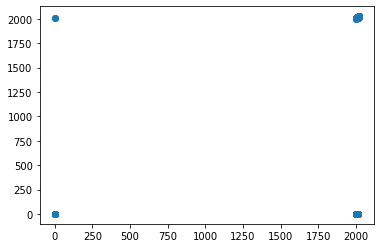

In [20]:
plt.scatter(cordis['startYear'],cordis['endYear'])

### Total cost

In [21]:
cordis['totalCost'].mean()

2609587.2945091953

array([[<AxesSubplot:title={'center':'totalCost'}>]], dtype=object)

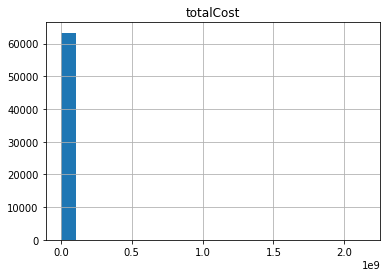

In [22]:
cordis.hist(column='totalCost',bins=20)

In [23]:
cordis['ecMaxContribution'].mean()

1856392.7889873683

array([[<AxesSubplot:title={'center':'ecMaxContribution'}>]], dtype=object)

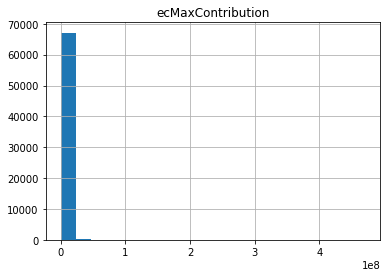

In [24]:
cordis.hist(column='ecMaxContribution',bins=20)

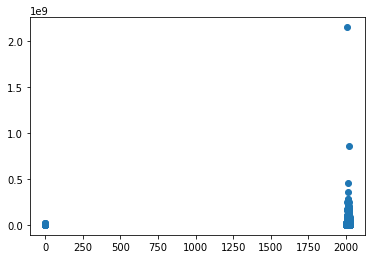

In [25]:
plt.scatter(cordis['endYear'],cordis['totalCost'])

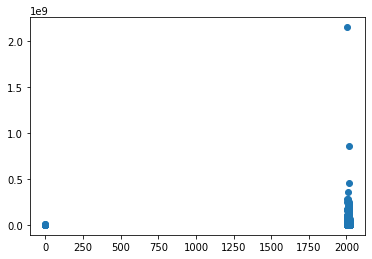

In [26]:
plt.scatter(cordis['startYear'],cordis['totalCost'])

### Coordinator country

In [27]:
cordis['coordinatorCountry'].value_counts()

UK    11918
DE     8096
FR     7049
ES     7018
IT     5739
NL     4522
BE     2660
CH     2563
SE     2002
AT     1833
DK     1798
IL     1740
EL     1634
IE     1377
FI     1169
NO     1112
PT     1071
PL      736
TR      548
HU      522
CZ      351
SI      264
EE      250
CY      240
RO      200
IS      184
BG      152
SK      140
LT      123
LU      122
RS      107
HR      100
LV       87
MT       64
RU       48
UA       45
MK       22
BA       19
AM       16
MD       15
ME       15
FO       11
GE        7
AL        4
AZ        4
BY        3
LI        2
MC        1
Name: coordinatorCountry, dtype: int64

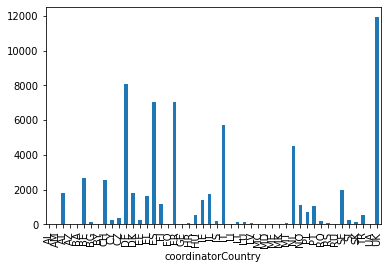

In [28]:
cordis.groupby('coordinatorCountry')['id'].nunique().plot(kind='bar')
plt.show()

In [29]:
heatmap_country_year_budget = pd.pivot_table(data=cordis,index='coordinatorCountry',values='totalCost',columns='endYear')
heatmap_country_year_budget.head()

endYear,0,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
coordinatorCountry,,,,,,,,,,,,,,,,,,,,,
AL,NaN,NaN,NaN,NaN,NaN,NaN,2.999700e+05,1.360000e+05,NaN,NaN,...,NaN,NaN,NaN,NaN,1.376794e+05,NaN,NaN,NaN,NaN,NaN
AM,7500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.592750e+04,4.203575e+04,NaN,2.702250e+04,5.998362e+05,8.884475e+05,NaN,NaN,NaN,NaN
AT,881189.666667,NaN,35620.0,871814.083333,1.073526e+06,1.585329e+06,2.794646e+06,3.588618e+06,2.878515e+06,2.510376e+06,...,3.003642e+06,2.800298e+06,2.954941e+06,3.105699e+06,3.356279e+06,3.857159e+06,4.187262e+06,3.699815e+06,5.924658e+06,7560221.93
AZ,NaN,NaN,NaN,NaN,2.800000e+04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.718470e+05,NaN,NaN,...,4.702750e+04,7.595158e+04,NaN,5.825417e+04,5.000000e+04,8.917575e+05,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='endYear', ylabel='coordinatorCountry'>

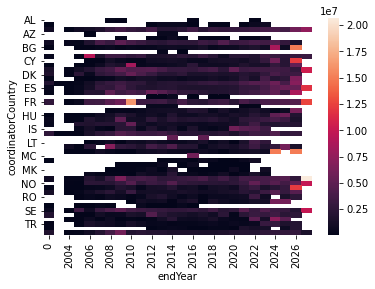

In [30]:
sns.heatmap(heatmap_country_year_budget)

# MALLET

In [31]:
from customMallet import CustomMallet

In [32]:
corpus_list = cordis['objective'].tolist()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
testmallet = CustomMallet()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
testmallet.corpus2doctopic(corpus_list,10)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: can only join an iterable